In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

ed_analysis=pd.read_csv('Ecommerce_Delivery_Analytics_New.csv') 
ed_analysis

,Order ID,Customer ID,Platform,Order Date & Time,Delivery Time (Minutes),Product Category,Order Value (INR),Customer Feedback,Service Rating,Delivery Delay,Refund Requested
0,ORD000001,CUST2824,JioMart,19:29.5,30,Fruits & Vegetables,382,"Fast delivery, great service!",5,No,No
1,ORD000002,CUST1409,Blinkit,54:29.5,16,Dairy,279,Quick and reliable!,5,No,No
2,ORD000003,CUST5506,JioMart,21:29.5,25,Beverages,599,Items missing from order.,2,No,Yes
3,ORD000004,CUST5012,JioMart,19:29.5,42,Beverages,946,Items missing from order.,2,Yes,Yes
4,ORD000005,CUST4657,Blinkit,49:29.5,30,Beverages,334,"Fast delivery, great service!",5,No,No
...,...,...,...,...,...,...,...,...,...,...,...
99995,ORD099996,CUST5324,JioMart,49:29.5,24,Dairy,289,Packaging could be better.,3,No,No
99996,ORD099997,CUST1677,JioMart,18:29.5,19,Snacks,322,Good quality products.,4,No,No
99997,ORD099998,CUST8198,JioMart,27:29.5,41,Dairy,135,"Fast delivery, great service!",5,Yes,No
99998,ORD099999,CUST9975,JioMart,14:29.5,31,Grocery,973,Quick and reliable!,5,No,No


In [2]:
ed_analysis.columns

Index(['Order ID', 'Customer ID', 'Platform', 'Order Date & Time',
       'Delivery Time (Minutes)', 'Product Category', 'Order Value (INR)',
       'Customer Feedback', 'Service Rating', 'Delivery Delay',
       'Refund Requested'],
      dtype='object')

In [3]:
ed_analysis.isnull().sum()

Order ID                   0
Customer ID                0
Platform                   0
Order Date & Time          0
Delivery Time (Minutes)    0
Product Category           0
Order Value (INR)          0
Customer Feedback          0
Service Rating             0
Delivery Delay             0
Refund Requested           0
dtype: int64

In [4]:
ed_analysis.shape

(100000, 11)

In [5]:
ed_analysis['Order Value (INR)'].mean()

590.9944

In [6]:
categories = ed_analysis['Product Category'].value_counts()
categories

Product Category
Dairy                  16857
Grocery                16737
Snacks                 16705
Fruits & Vegetables    16632
Beverages              16536
Personal Care          16533
Name: count, dtype: int64

In [7]:
ed_analysis['Platform'].value_counts()

Platform
Swiggy Instamart    33449
Blinkit             33424
JioMart             33127
Name: count, dtype: int64

In [8]:
class EcommerceAnalysis:
    def __init__(self,ed_analysis):
        self.ed_analysis = self
    def refund_requests(self):
        return ed_analysis[ed_analysis['Refund Requested']=='Yes'].groupby('Platform').size().reset_index()
    def avg_delivery_time(self):
        return ed_analysis.groupby('Platform')['Delivery Time (Minutes)'].mean().reset_index()
    def In_time_delivery_count(self):
        delay_counts = ed_analysis[['Platform', 'Delivery Delay']].value_counts().unstack(fill_value=0).reset_index()
        return delay_counts
    def platform_total_order_value(self):
        return ed_analysis.groupby('Platform')['Order Value (INR)'].sum().reset_index()
    def refund_count_categories(self):
        return ed_analysis[ed_analysis['Refund Requested']=='Yes'].groupby('Product Category').size()
    def low_rated_platform(self):
        return ed_analysis[ed_analysis['Service Rating']<=3].groupby('Platform').size().head(1)
    def pivot_table(self):
        pivot = pd.pivot_table(data = ed_analysis,values = 'Order Value (INR)',columns = 'Platform',index = 'Product Category',aggfunc = 'sum').reset_index()
        return pivot
        
    def pivot_table_DD(self):
        pivot_DD = pd.pivot_table(data = ed_analysis,columns = 'Platform',index = 'Delivery Delay',values  = 'Order Value (INR)',aggfunc = 'count').reset_index()
        return pivot_DD

In [9]:
obj_balu = EcommerceAnalysis(ed_analysis)

print('count_of_refund_requests:')
print(obj_balu.refund_requests())

print('avg delivery time of each platform:')
print(obj_balu.avg_delivery_time())

print('In time delivery time:')
print(obj_balu.In_time_delivery_count())

print('Platform wise total order value:')
print(obj_balu.platform_total_order_value())

print('count of refunded categories:')
print(obj_balu.refund_count_categories())

print('low rated platform less than 3 rating:')
print(obj_balu.low_rated_platform())

print('pivot table:')
print(obj_balu.pivot_table())

print('pivot table of delivery delay:')
print(obj_balu.pivot_table_DD())


count_of_refund_requests:
           Platform      0
0           Blinkit  15353
1           JioMart  15178
2  Swiggy Instamart  15288
avg delivery time of each platform:
           Platform  Delivery Time (Minutes)
0           Blinkit                29.474898
1           JioMart                29.634498
2  Swiggy Instamart                29.499925
In time delivery time:
Delivery Delay          Platform     No   Yes
0                        Blinkit  28951  4473
1                        JioMart  28547  4580
2               Swiggy Instamart  28830  4619
Platform wise total order value:
           Platform  Order Value (INR)
0           Blinkit           19705084
1           JioMart           19562372
2  Swiggy Instamart           19831984
count of refunded categories:
Product Category
Beverages              7549
Dairy                  7691
Fruits & Vegetables    7692
Grocery                7811
Personal Care          7517
Snacks                 7559
dtype: int64
low rated platform less th

In [10]:
ed_analysis['Customer Feedback'].value_counts()

Customer Feedback
Easy to order, loved it!                      7791
Good quality products.                        7789
Excellent experience!                         7784
Very satisfied with the service.              7740
Wrong item delivered.                         7738
Items missing from order.                     7737
Fast delivery, great service!                 7715
Packaging could be better.                    7704
Quick and reliable!                           7658
Delivery person was rude.                     7643
Very late delivery, not happy.                7592
Not fresh, disappointed.                      7580
Horrible experience, never ordering again.    7529
Name: count, dtype: int64

In [11]:
# count of delayed vs. on-time deliveries.
delay_counts = ed_analysis[['Platform', 'Delivery Delay']].value_counts().unstack(fill_value=0)
delay_counts

Delivery Delay,No,Yes
Platform,,
Blinkit,28951,4473
JioMart,28547,4580
Swiggy Instamart,28830,4619


In [12]:
#Which platform has the fastest average delivery time?
ed_analysis.columns

Index(['Order ID', 'Customer ID', 'Platform', 'Order Date & Time',
       'Delivery Time (Minutes)', 'Product Category', 'Order Value (INR)',
       'Customer Feedback', 'Service Rating', 'Delivery Delay',
       'Refund Requested'],
      dtype='object')

In [13]:
#Which product category generates the highest revenue
high = ed_analysis.groupby('Product Category')['Order Value (INR)'].sum().sort_values(ascending=False)
high                   

Product Category
Personal Care          17395601
Grocery                14194055
Beverages               9086669
Dairy                   7610522
Fruits & Vegetables     6246517
Snacks                  4566076
Name: Order Value (INR), dtype: int64

In [14]:
ed_analysis.columns

Index(['Order ID', 'Customer ID', 'Platform', 'Order Date & Time',
       'Delivery Time (Minutes)', 'Product Category', 'Order Value (INR)',
       'Customer Feedback', 'Service Rating', 'Delivery Delay',
       'Refund Requested'],
      dtype='object')

In [15]:
late_delivery_platforms = ed_analysis[ed_analysis['Delivery Time (Minutes)']>=30].groupby('Platform').size()
late_delivery_platforms

Platform
Blinkit             16713
JioMart             16810
Swiggy Instamart    16652
dtype: int64

In [16]:
print(ed_analysis['Delivery Time (Minutes)'].max())
print(ed_analysis['Delivery Time (Minutes)'].min())

76
5


In [17]:
ed_analysis.sort_values(by='Order Value (INR)',ascending=False )

,Order ID,Customer ID,Platform,Order Date & Time,Delivery Time (Minutes),Product Category,Order Value (INR),Customer Feedback,Service Rating,Delivery Delay,Refund Requested
98210,ORD098211,CUST5408,JioMart,03:29.5,44,Personal Care,2000,"Very late delivery, not happy.",2,Yes,Yes
68551,ORD068552,CUST8187,JioMart,38:29.5,33,Personal Care,2000,Excellent experience!,5,No,No
12683,ORD012684,CUST3486,Swiggy Instamart,17:29.5,11,Personal Care,2000,Good quality products.,4,No,No
21023,ORD021024,CUST9108,Swiggy Instamart,36:29.5,16,Personal Care,2000,Packaging could be better.,3,No,No
70417,ORD070418,CUST3057,JioMart,40:29.5,36,Personal Care,2000,Excellent experience!,5,No,No
...,...,...,...,...,...,...,...,...,...,...,...
36046,ORD036047,CUST5566,Swiggy Instamart,27:29.5,38,Snacks,50,"Horrible experience, never ordering again.",1,No,Yes
14121,ORD014122,CUST9786,Blinkit,52:29.5,42,Fruits & Vegetables,50,"Horrible experience, never ordering again.",1,Yes,Yes
50707,ORD050708,CUST3878,Blinkit,23:29.5,35,Fruits & Vegetables,50,Excellent experience!,5,No,No
60190,ORD060191,CUST2493,JioMart,59:29.5,28,Snacks,50,Items missing from order.,2,No,Yes


In [18]:
#ed_analysis.drop(columns ='late_delivery_platforms',inplace = True)
ed_analysis.columns

Index(['Order ID', 'Customer ID', 'Platform', 'Order Date & Time',
       'Delivery Time (Minutes)', 'Product Category', 'Order Value (INR)',
       'Customer Feedback', 'Service Rating', 'Delivery Delay',
       'Refund Requested'],
      dtype='object')

<Axes: xlabel='Service Rating', ylabel='Count'>

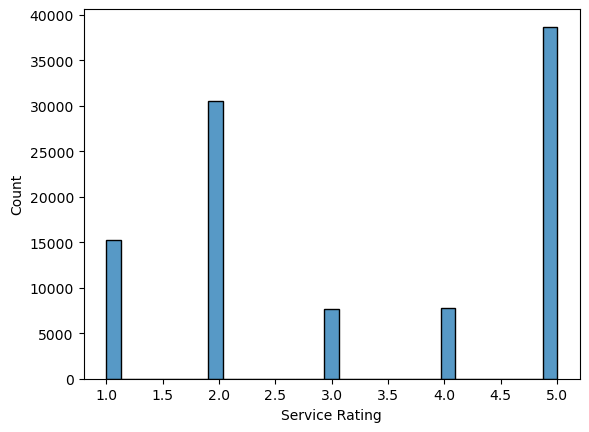

In [19]:
import seaborn as sns
sns.histplot(ed_analysis['Service Rating'])

<Axes: xlabel='Product Category', ylabel='Order Value (INR)'>

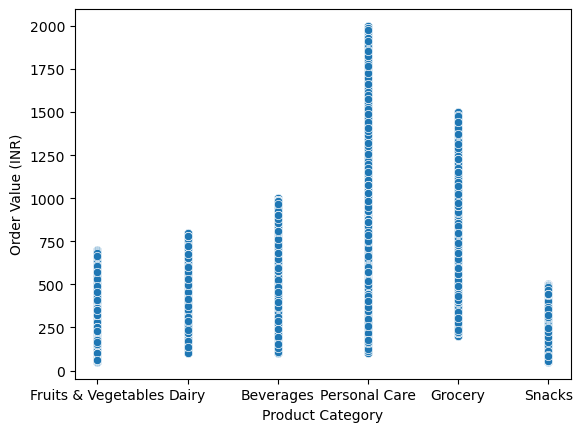

In [20]:
sns.scatterplot(data = ed_analysis,x='Product Category',y = 'Order Value (INR)')

{'whiskers': [<matplotlib.lines.Line2D at 0x2c4cd49d3d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2c4ce011950>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c4cdfa5010>],
 'medians': [<matplotlib.lines.Line2D at 0x2c4ce012ed0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c4ce0139d0>],
 'means': []}

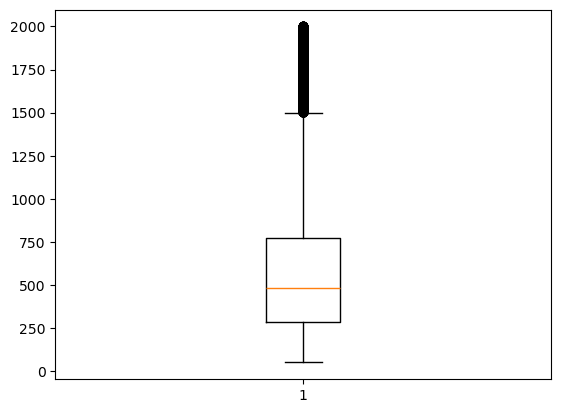

In [21]:
plt.boxplot(ed_analysis['Order Value (INR)'])

In [22]:
pivot = pd.pivot_table(data = ed_analysis,values = 'Order Value (INR)',columns = 'Platform',index = 'Product Category',aggfunc = 'sum')
pivot

Platform,Blinkit,JioMart,Swiggy Instamart
Product Category,,,
Beverages,3063913,2967101,3055655
Dairy,2547605,2516935,2545982
Fruits & Vegetables,2097912,2075237,2073368
Grocery,4731502,4746467,4716086
Personal Care,5741039,5736371,5918191
Snacks,1523113,1520261,1522702


In [23]:
pivot_DD = pd.pivot_table(data = ed_analysis,columns = 'Platform',index = 'Delivery Delay',values  = 'Order Value (INR)',aggfunc = 'count')
pivot_DD

Platform,Blinkit,JioMart,Swiggy Instamart
Delivery Delay,,,
No,28951,28547,28830
Yes,4473,4580,4619


In [24]:
ed_analysis.describe()

,Delivery Time (Minutes),Order Value (INR),Service Rating
count,100000.000000,100000.000000,100000.000000
mean,29.536140,590.994400,3.240790
std,9.958933,417.409058,1.575962
min,5.000000,50.000000,1.000000
25%,23.000000,283.000000,2.000000
50%,30.000000,481.000000,3.000000
75%,36.000000,770.000000,5.000000
max,76.000000,2000.000000,5.000000


In [25]:

ed_analysis[ed_analysis['Order Value (INR)']>=700][['Customer ID', 'Platform', 'Order Date & Time']]

,Customer ID,Platform,Order Date & Time
3,CUST5012,JioMart,19:29.5
5,CUST3286,Blinkit,36:29.5
6,CUST2679,JioMart,22:29.5
9,CUST7912,JioMart,08:29.5
11,CUST1488,JioMart,12:29.5
...,...,...,...
99982,CUST2548,Blinkit,05:29.5
99986,CUST8645,JioMart,44:29.5
99988,CUST3412,Swiggy Instamart,39:29.5
99992,CUST7977,Swiggy Instamart,05:29.5


In [27]:
ed_analysis.columns

Index(['Order ID', 'Customer ID', 'Platform', 'Order Date & Time',
       'Delivery Time (Minutes)', 'Product Category', 'Order Value (INR)',
       'Customer Feedback', 'Service Rating', 'Delivery Delay',
       'Refund Requested'],
      dtype='object')

In [34]:
#PCC method to find correlation between two continous method
import numpy as np
print(np.corrcoef(ed_analysis['Order Value (INR)'],ed_analysis['Service Rating']))
np.corrcoef(ed_analysis['Order Value (INR)'],ed_analysis['Service Rating'])[0][1]

[[ 1.         -0.00268924]
 [-0.00268924  1.        ]]


-0.0026892425135415345

In [47]:
#Correlation between Platform and Delivery Delay using Chi - square test (two categorical variables)
from scipy.stats import chi2_contingency
import pandas as pd

contingency_table = pd.crosstab(ed_analysis['Platform'],ed_analysis['Delivery Delay'])
contingency_table
chi2_contingency(contingency_table)

Chi2ContingencyResult(statistic=3.5663478600158762, pvalue=0.16810375011070328, dof=2, expected_freq=array([[28854.27072,  4569.72928],
       [28597.87656,  4529.12344],
       [28875.85272,  4573.14728]]))

In [46]:
# ANOVA method is used to find correlation between Continuous & Categorical variables.
from scipy.stats import f_oneway

Swiggy_Instamart_list = list(ed_analysis[ed_analysis['Platform'] == 'Swiggy_Instamart']['Order Value (INR)'])
Blinkit_list = list(ed_analysis[ed_analysis['Platform'] == 'Blinkit']['Order Value (INR)'])
JioMart_list = list(ed_analysis[ed_analysis['Platform'] == 'JioMart']['Order Value (INR)'])
C_all_list = list(ed_analysis[ed_analysis['Platform'] == 'C all']['Order Value (INR)'])


f_oneway(Swiggy_Instamart_list,Blinkit_list,JioMart_list,C_all_list)[1] 

C:\Users\91767\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


nan

In [36]:
ed_analysis['Product Category'].value_counts()

Product Category
Dairy                  16857
Grocery                16737
Snacks                 16705
Fruits & Vegetables    16632
Beverages              16536
Personal Care          16533
Name: count, dtype: int64

In [44]:
ed_analysis['Platform'].value_counts()

Platform
Swiggy Instamart    33449
Blinkit             33424
JioMart             33127
Name: count, dtype: int64

In [48]:
def get_outliers(col):
    q1 = ed_analysis[col].describe()['25%']
    q3 = ed_analysis[col].describe()['75%']
    iqr = q3-q1
    return [val for val in ed_analysis['Order Value (INR)'].values if val >q3 + (1.5*iqr)],\
           [val for val in ed_analysis['Order Value (INR)'].values if val<q1-(1.5*iqr)]

get_outliers('Order Value (INR)')

([1939,
  1693,
  1651,
  1595,
  1956,
  1848,
  1690,
  1929,
  1727,
  1553,
  1634,
  1639,
  1534,
  1910,
  1864,
  1586,
  1585,
  1701,
  1767,
  1757,
  1756,
  1870,
  1637,
  1575,
  1702,
  1760,
  1887,
  1640,
  1524,
  1689,
  1811,
  1590,
  1690,
  1948,
  1768,
  1792,
  1917,
  1927,
  1824,
  1730,
  1841,
  1929,
  1813,
  1983,
  1709,
  1743,
  1693,
  1727,
  1711,
  1914,
  1736,
  1575,
  1613,
  1833,
  1934,
  1530,
  1630,
  1601,
  1602,
  1598,
  1927,
  1811,
  1960,
  1686,
  1586,
  1705,
  1834,
  1973,
  1963,
  1888,
  1675,
  1635,
  1814,
  1702,
  1527,
  1711,
  1625,
  1967,
  1749,
  1633,
  1731,
  1613,
  1792,
  1941,
  1881,
  1530,
  1770,
  1539,
  1932,
  1733,
  1778,
  1563,
  1594,
  1760,
  1504,
  1951,
  1545,
  1632,
  1697,
  1788,
  1845,
  1953,
  1780,
  1758,
  1956,
  1508,
  1965,
  1602,
  1778,
  1774,
  1889,
  1826,
  1665,
  1619,
  1841,
  1791,
  1918,
  1693,
  1609,
  1977,
  1948,
  1720,
  1974,
  1945,
  1626,


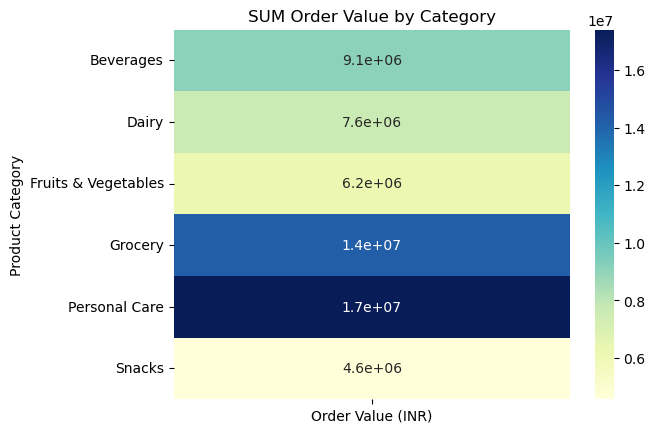

In [57]:
pivot = ed_analysis.pivot_table(
    index="Product Category",
    values="Order Value (INR)",
    aggfunc="sum"
)

sns.heatmap(pivot, annot=True, cmap="YlGnBu")
plt.title("SUM Order Value by Category")
plt.show()